
<br>

# Weighted kernel density estimation to quickly reproduce the profile of a diffractometer

<br>

<br>

This example shows a work-arround for a quick visualization of a diffractorgram (similar to experimental powder diffractograms) from **ImageD11** ".flt" or ".new" columnfile containing peaks information.

It is basically a **probability density function** (pdf) of the _$2\theta$ position_ of the peak, which is weighted by the _peak intensity_.
<br>The smoothing of such gaussian kde is decided by the _**bandwidht**_ value.

[Weighted kde](https://nbviewer.jupyter.org/gist/tillahoffmann/f844bce2ec264c1c8cb5) : The original Scipy gaussian kde was modified by [Till Hoffmann](http://tillahoffmann.github.io/) to allow for heterogeneous sampling weights.

<br>


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ImageD11.columnfile import columnfile
from ImageD11 import weighted_kde as wkde

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 12



### Loading and visualizing the input data

Text(0.5, 1.0, '$Diffraction \\, angles$')

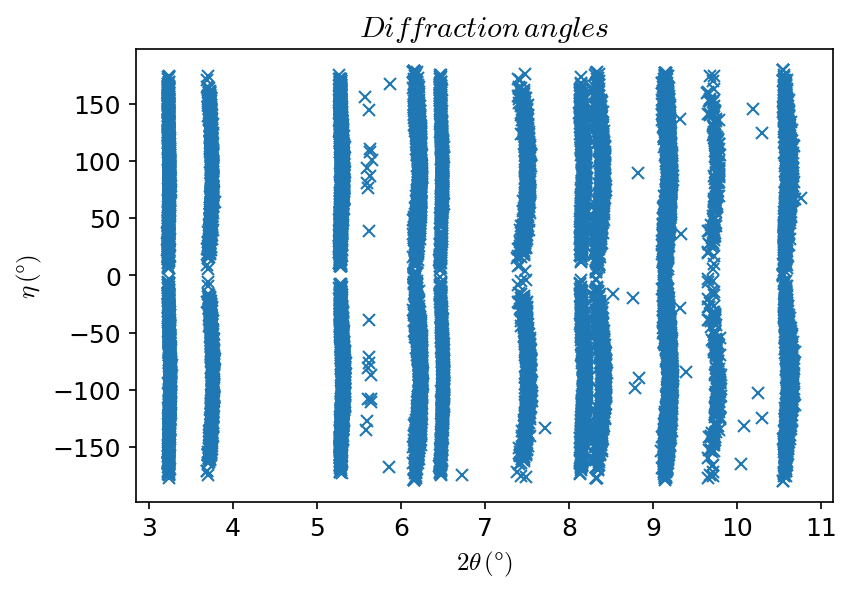

In [3]:
# read the peaks
flt = columnfile('sma_261N.flt.new')

# peaks indexed to phase 1
phase1 = flt.copy()
phase1.filter( phase1.labels > -1 )

# unindexed peaks (phase 2 + unindexed phase 1?)
phase2 = flt.copy()
phase2.filter( phase2.labels == -1 )

#plot radial transform for phase 1
plt.plot( phase1.tth_per_grain, phase1.eta_per_grain, 'x')
plt.xlabel( r'$ 2 \theta \, (\degree) $' )
plt.ylabel( r'$ \eta \, (\degree) $' )
plt.title(  r'$Diffraction \, angles$' )

### Plotting the diffraction profile



Text(0.5, 1.0, ' With bandwidth = 0.247')

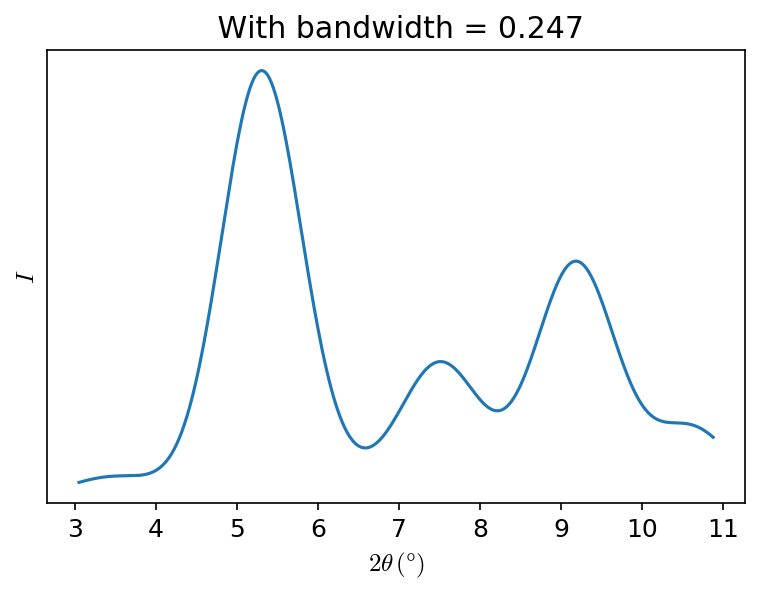

In [4]:
# Probability density function (pdf) of 2theta
# weighted by the peak intensity and using default 2theta bandwidth
I_phase1 = phase1.sum_intensity * phase1.Lorentz_per_grain
pdf = wkde.gaussian_kde( phase1.tth_per_grain, weights = I_phase1)

# Plotting it over 2theta range
x = np.linspace( min(flt.tth), max(flt.tth), 500 )
y = pdf(x)
plt.plot(x, y)
plt.xlabel( r'$ 2 \theta \, (\degree) $' )
plt.ylabel( r'$ I $' )
plt.yticks([])
plt.title( ' With bandwidth = %.3f'%pdf.factor )

The profile showed above is highly smoothed and the hkl peaks are merged.<br>
$\to$ _A Smaller bandwidth should be used._



### Choosing the right bandwidth of the estimator

The _bandwidth_ can be passed as argument to the **gaussian_kde()** object or set afterward using the later **set_badwidth()** method. For example, the bandwidth can be reduced by a factor of 100 with respect to its previous value:
```Python
gaussian_kde().set_bandwidth( gaussian_kde().factor / 100 )
```

In [5]:
pdf_phase1 = wkde.gaussian_kde( phase1.tth, weights = phase1.sum_intensity )
pdf_phase2 = wkde.gaussian_kde( phase2.tth, weights = phase2.sum_intensity )
frac_phase1 = np.sum( phase1.sum_intensity ) / np.sum( flt.sum_intensity )
frac_phase2 = np.sum( phase2.sum_intensity ) / np.sum( flt.sum_intensity )

from ipywidgets import interact
bw_range = ( 0.001, pdf_phase1.factor/3, 0.001)
@interact( bandwidth = bw_range)
def plot_pdf(bandwidth):
    pdf_phase1.set_bandwidth(bandwidth)
    pdf_phase2.set_bandwidth(bandwidth)
    y_phase1 = pdf_phase1(x)
    y_phase2 = pdf_phase2(x)
    plt.plot( x, frac_phase1 * y_phase1, label = r'$Phase \, 1$' )
    plt.plot( x, frac_phase2 * y_phase2, label = r'$Phase \, 2$' )
    plt.legend(loc='best')
    plt.xlabel( r'$ 2 \theta \, (\degree) $' )
    plt.ylabel( r'$ I $' )
    plt.yticks([])
    plt.title( r'$ 3DXRD \, diffractogram $' )

interactive(children=(FloatSlider(value=0.043000000000000003, description='bandwidth', max=0.08523560743665533…